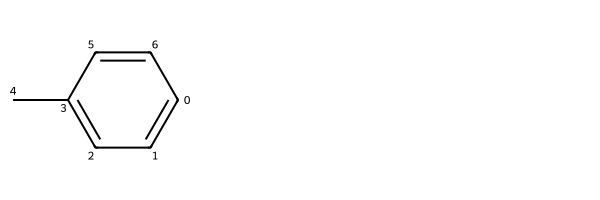

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

# set SMILES for toluene
smiles = "c1ccc(C)cc1"

# Convert to RDKit molecule 
mol = Chem.MolFromSmiles(smiles)

# Draw the strucutre
Draw.MolsToGridImage([mol])

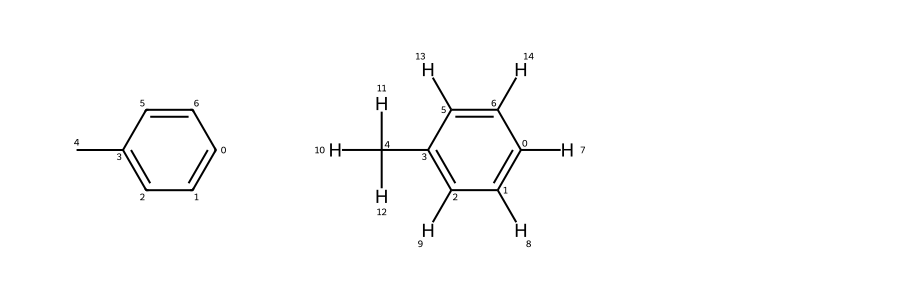

In [2]:

# Add hydrogens
mol_h = Chem.AddHs(mol)

# Display both structures
Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

In [3]:

# The current molecule has z = 0 for all atoms
# This is a 2D molecule
print(Chem.MolToMolBlock(mol_h))


     RDKit          2D

 15 15  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000   -1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0

In [4]:

# Let us make it 3D by generating a random conformer
Chem.AllChem.EmbedMolecule(mol_h)

# look at the molecule again
print(Chem.MolToMolBlock(mol_h))



     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
   -2.0355    0.0536   -0.0835 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3527    1.2535   -0.0816 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0354    1.1822   -0.0302 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7074   -0.0231    0.0170 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2076   -0.0764    0.0722 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0258   -1.1931    0.0128 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4052   -1.1744   -0.0374 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1123    0.0748   -0.1228 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8685    2.2218   -0.1187 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5765    2.1081   -0.0282 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.6668   -0.2130   -0.9129 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.6111    0.8843    0.4944 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5240   -0.8609    0.8116 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4618   -2.1584    0

In [5]:
Chem.MolToMolFile(mol_h,"toluene.mol")



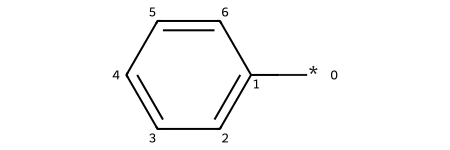

In [ ]:

# generate the core molcule
core = Chem.MolFromSmiles('*c1ccccc1')
core

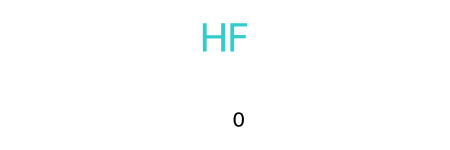

In [7]:
# For simplicity let's use one functional group
functional_group = "F"
functional_mol = Chem.MolFromSmiles(functional_group)
functional_mol

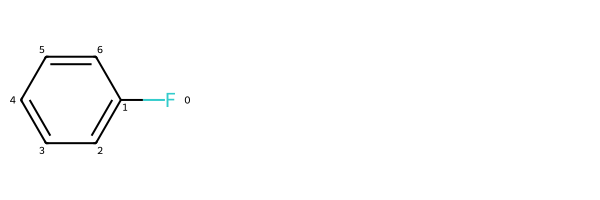

In [9]:
# generate the combined molecule
product = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'),functional_mol)
new_smiles = Chem.MolToSmiles(product[0])
new_mol = Chem.MolFromSmiles(new_smiles)

# Draw the new molecule
Draw.MolsToGridImage([new_mol])

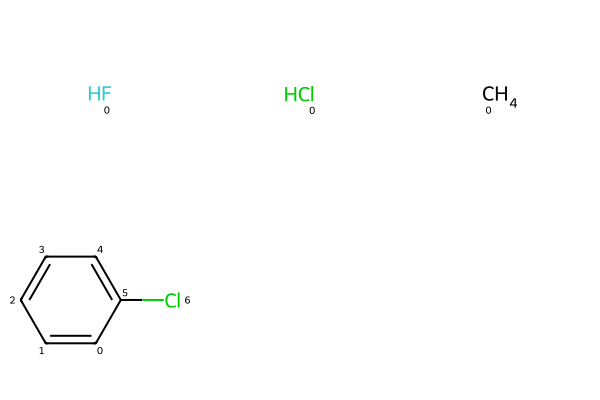

In [10]:
# create a list of functional groups
functional_groups = ['F','Cl','C','c1ccccc1Cl']
functional_mols = [Chem.MolFromSmiles(group) for group in functional_groups]

# Draw the groups
Draw.MolsToGridImage(functional_mols)

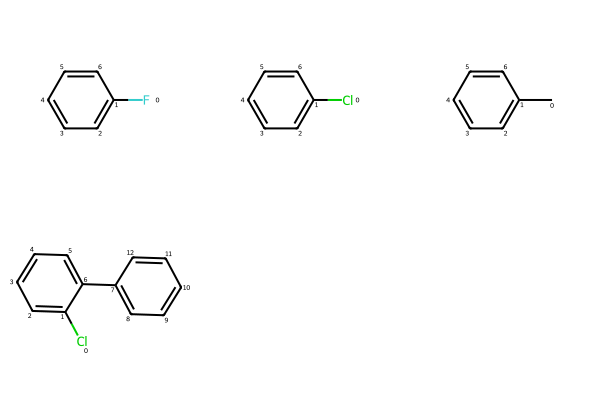

In [11]:
product_smi = []
for functional_mol in functional_mols:
    product_mol = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'),functional_mol)
    product_smi.append(Chem.MolToSmiles(product_mol[0]))
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in product_smi])
